# 9. hét / Prológus

A mai órán a következőkről lesz szó:
- Elméleti bevezetés a Deep Learningbe (~ 20 perc)
- Regresszió mélytanulás segítségével: California Housing Prices (~ 30 perc)
- Klasszifikáció mélytanulás segítségével: MNIST (~ 30 perc)

# 9. hét / I. Elméleti bevezetés a Deep Learningbe

## Ismétlés: Machine Learning feladatok megoldása

Jellemzően a gépi tanulás feladatai az alábbi lépésekből épülnek fel:
1. **Adatgyűjtés**, mérés:<span style="color:red"> Az adattudományok nem fognak működni adatok nélkül!</span> Fontos, hogy a mérések elvégzése előtt tegyünk becsléseket arra vonatkozóan, hogy mennyire sok adatra van szükségünk és mekkora paramétertérrel akarunk dolgozni! Minél több paramétert mérünk, annál több adatra van szükségünk! (A paramétertér dimenziójával exponenciálisan növekszik a szükséges adattér "térfogata".)

2. **Adatfeltérképezés**: alapvető - statisztikai eszközökkel történő - megismerkedés az adatbázisunkkal. Például ábrázoljuk az egyes attribútumok eloszlását, szórását, vagy kirajzoljuk a térbeli és időbeli folyamatokat.

3. ! **Adatok előkészítése**, data preprocessing: az adathalmaz előkészítése a modellek betanításának megfelelően. Ez maga a "kreatív agya" az adattudományoknak, amikor a nyers adatbázisból kiszűrjük a számunkra lényeges részeket. Az adat minőségi paramétereitől függően teljesen eltérő eszközöket igényel: például egy képet gyakran fekete-fehérre átállítunk, átméretezünk, megkeressük és kiemeljük rajta az éleket, hogy kizárólag a lényeges információtartalommal rendelkező adattal dolgozzon az algoritmusunk. Minél ügyesebben tudjuk elvégezni az adathalmaz előkészítését, annál több nehézségtől mentjük meg magunkat meg a tanítás során!

4. **Modellválasztás**: a tanító modell meghatározása. (*Megjegyzés: valójában a modellt ismernünk kell már a preprocessing előtt, elvégre a válaszott modellre fogjuk optimalizálni a nyers adathalmazt!*) Ez mindig azzal kezdődik, hogy definiáljuk a problémát (például klasszifikációt, vagy regressziót akarunk-e csinálni) és ennek megfelelően keresünk a szakirodalomban megfelelő megoldásokat. Ezek alapján összeállítjuk a modellünket.

5. **Modell illesztés**, tanítás: a választott modell betanítása.

6. **Kiértékelés**: a tanító folyamat kiértékelése megadott teljesítménymetrikák (például *precision*, *recall*, vagy *accuracy*) alapján. Érdemes ezek változását is ábrázolni a tanítás során.

7. **Modell paramétereinek finomhangolása**: az előfeldolgozás, vagy a választott modellünk módosítása a teljesítménymetrikák szerint; illetve a tanítás során fellépő rendellenességek és anomáliák feltérképezése. Gyakran előfordul, hogy ugyan működik is a modellünk, de esetleg nem elég pontos, nem elég megbízható, nem tud eléggé általánosítani, túltanult. Ilyenkor az első négy lépésen visszafelé érdemes elkezdeni végighaladni és onnan újrakezdve optimalizálni a modellt. 

8. **Alkalmazás**: az előre meghatározott célnak megfelelő modell telepítése.

## A perceptron modell

![perceptron](perceptron.png)

# 9. hét / II. Regresszió: California Housing Prices

Az alábbiakban meg fogunk ismerkedni a neurális hálók egy klasszikus "Hello World!" feladatával.

Adott egy adathalmazunk, amely a California állambeli házak árát tartalmazza 8 paraméter függvényében. Feladatunk az, hogy készítsünk egy olyan matematikai modellt, amely képes predikciókat tenni arra vonatkozóan, hogy az adatbázisba egy újonnan bekerülő ingatlant mennyi pénzbe kerülhet.

Az adatbázis elérhető az [alábbi linken](https://scikit-learn.org/stable/datasets/real_world.html#california-housing-dataset).

**Megoldás**:

Szükséges framework telepítése:

In [ ]:
%pip install tensorflow

### Szükséges importok

In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import copy
import pandas as pd
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler

nyolc = 9
np.random.seed(nyolc)

### 1. Adatgyűjtés

Az adatgyűjtés problémáját a megfelelő szaktárgyak fedik le, mint például a Méréstechnika, Szenzor- és aktuátortechnika, Mikrovezérlők programozása, illetve egyes specializációkon ebben még részletesebben is elmélyülhetnek az érdeklődők.

Jelen kurzus nem fektet különösebb hangsúlyt arra, hogy a résztvevők a mérésadatgyűjtés és jelfeldolgozás eszközeiben jobban elmélyedjenek. Ennek elsődleges oka, hogy ezekről már külön-külön is egy teljes féléves anyagot össze lehetne állítani. A másik nagyon fontos dolog, hogy mérni (különösen akkora méretekben, mint ahogy azt az adattudományok igénylik! Emlékeztetőül: ha a vizsgált attribútumok száma $n$, akkor a szükséges adathalmaz mérete $2^n$-nel arányos!) roppant **költséges** folyamat! Gondoljunk csak arra, hogy a pontos mérésekhez mennyire sok szenzorra és mindeneklőtt üzemórára van szükségünk.

Ezen megfontolásokkal a tárgy keretein belül mindig feltételezzük, hogy **a megoldani kívánt feladat szempontjából alkalmas adatbázis áll rendelkezésre!**

In [4]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

### 2. Adatfeltérképezés

Jellemzően az adatfeltérképezés során rengeteg ábrát és statisztikai eszközt érdemes ráereszteni az adatbázisunkra. Mivel jelen esetben egy nagyon jól ismert adathalmazról van szó, ettől most eltekinthetünk. Részletes leírást az [alábbi linken](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html) kaphatunk.

Többek között azért fontos ez, hogy például ki tudjunk választani olyan attribútumokat, vagy változókat amelyek feltehetően teljesen irrelevánsak. Vagy éppen előre megjósolhassuk, hogy vajon mik lesznek a fontos paraméterek. 

In [5]:
california_housing.frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


### 3. Data preprocessing

**3.1 Az adathalmaz felbontása**

Nagyon fontos lépés, hogy miután preprocesszáltuk a nyers adatot, utána osszuk fel három különböző részre. Ezek mind más funkciót fognak betölteni a *tanítás* során!
- **Training set**, vagy *tanító adathalmaz*: az adatnak az a része, amelyet ténylegesen fel fog dolgozni a neurális háló. Elsősorban ez az adathalmaz fogja definiálni a neurális háló főbb paramétereit. 

- **Validation set**, vagy *validációs adathalmaz*: a kiindulási adathalmaz azon része, amelyet ugyan tanítás közben folyamatosan lát a neurális háló, de az ebből szerzett információt csak a modell finomhangolására és hiperparaméteroptimalizálására használja. Például a validációs adathalmaz segítségével könnyen ellenőrizhetővé válik, hogy hány *epoch* után érdemes leállítani a tanítást, hogy elkerüljük az overfitting-et! (A validációs adathalmazt definiálni nem kötelező, de az esetek túlnyomó részében több, mint érdemes!)

- **Test set**, vagy *tesztelési adathalmaz*: azon adathalmaz, amelyet a tanítás végeztével arra használunk, hogy a neurális háló metrikáit kiértékeljük. Ezt az adathalmazt tanítás során semmiképp sem láthatja a neurális háló, ugyanis az meghamisítaná a modell teljesítményét!

Ökölszabályként érdemes megjegyezni, hogy jellemzően 60%-20%-20%, 70%-15%-15% arányokat szoktunk választani! Viszont fontos emellett, hogy ezen halmazoknak nem is az aránya, sokkal inkább a homogenitása ami mérvadó! Nagyon fontos, hogy mindhárom halmazban minél ideálisabban legyen reprezentálva a teljes adathalmaz, különben sok anomáliával szembesülhetünk! *(Például fontos, hogy egy rendezett adathalmazt ne egymás utáni részekre osszuk fel, hanem véletlenszerűen válasszuk ki az egyes elemeket! Ha nem így teszünk, akkor könnyen előfordulhat, hogy tanítás során például közel 100%-os accuracy értéket kapunk, a tesztelés során pedig ettől jelentősen kevesebb érték jelenik meg.)*

**3.2 Az adathalmaz standardizálása**

Szigorúan az adathalmaz felosztása után érdemes egyenként a tanító, validációs és tesztelési adathalmazainkat standardizálni. Ez azt jelenti, hogy a $\mathbf{X}$ adathalmazunk elemeit **normalizál**juk, azaz úgy transzformáljuk, hogy az $E$ **várható érték**e (jelen esetben: számtani közép, amit szokás még $\mu$-vel is jelölni) **zérus**, illetve a $\sigma$ **szórás**a **egységnyi** legyen! 
$\begin{equation} \hat{\mathbf{X}} = \frac{\mathbf{X}-E}{\sigma} \end{equation}$
Erre azért van szükség, hogy egyrészt ne kelljen feleslegesen nagy számokkal dolgoznia a neurális hálónak, másrészt pedig azért, hogy könnyebben tudjon általánosítani a modell.

*(Megjegyzés: miért nem mindegy, hogy az adathalmaz felbontása előtt, vagy után standardizáljuk az adatot? Melyik adathalmaznak és melyik aspektusa sérülne, ha fordítva járnánk el?)*

In [6]:
dataset = california_housing.frame.values

# Tanító-validációs-tesztelő adathalmazok méretének definiálása
test_split = 0.1
valid_split = 0.1

X = dataset[:,0:-1]
Y = dataset[:,-1]

# A megfelelő arányokban felosztjuk az egyes adathalmazokat
v_index = int(X.shape[0]*(1-valid_split-test_split))
t_index = int(X.shape[0]*(1-test_split))

# Tesztelő adat: 90%-tól végig
X_test = X[t_index:]
Y_test = Y[t_index:]

# Validációs adat: 80%-90%-ig
X_valid = X[v_index:t_index]
Y_valid = Y[v_index:t_index]

# Tanító adat: elejétől a 80%-ig
X = X[:v_index]
Y = Y[:v_index]

# Normalizáljuk az adatot (σ = 1, E = 0)
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

### 4. Modellválasztás

![sgd.jpg](sgd.jpg)

In [22]:
# Callback függvények definiálása
patience=50
early_stopping=EarlyStopping(patience=patience, verbose=1)
checkpointer=ModelCheckpoint(filepath='weights.keras', save_best_only=True, verbose=1)

# Modell felépítése
model = Sequential()
model.add(Dense(units=200, input_dim=X.shape[1]))
model.add(Activation('sigmoid'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='linear'))
model.summary()

# Model tanításának hiperparaméterei
sgd = SGD(learning_rate=1e-3, weight_decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='mse', optimizer=sgd)

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                 │ (None, 200)            │         1,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 200)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           201 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,001 (7.82 KB)

 Trainable params: 2,001 (7.82 KB)

 Non-trainable params: 0 (0.00 B)

### 5. Modell illesztés

Miután definiáltuk az összes szükséges paramétert a modellünkben, kezdődhet maga a tanítási folyamat. Fontos megjegyezni, hogy ez egy masszívan számításigényes folyamat, ezért egy-egy tanítás könnyűszerrel igénybevehet több órát, de akár napokat is! Emiatt mindig érdemes egyszerűbb modelleket felépíteni, kevesebb réteggel és kevesebb neuronnal, a gyors betanulás érdekében. Ezen csak akkor érdemes javítani, ha a cél szempontjából jelentősen alulteljesít a modellünk.

In [23]:
history=model.fit(X,Y,epochs=10000,
                  batch_size=16,
                  verbose=2,
                  validation_data=(X_valid, Y_valid),
                  callbacks=[checkpointer, early_stopping])

Epoch 1/10000



Epoch 1: val_loss improved from inf to 1.06768, saving model to weights.keras
1032/1032 - 2s - 2ms/step - loss: 1.0694 - val_loss: 1.0677
Epoch 2/10000

Epoch 2: val_loss did not improve from 1.06768
1032/1032 - 1s - 1ms/step - loss: 0.8673 - val_loss: 1.0706
Epoch 3/10000

Epoch 3: val_loss improved from 1.06768 to 0.87741, saving model to weights.keras
1032/1032 - 1s - 1ms/step - loss: 0.8101 - val_loss: 0.8774
Epoch 4/10000

Epoch 4: val_loss did not improve from 0.87741
1032/1032 - 1s - 1ms/step - loss: 0.7799 - val_loss: 0.9797
Epoch 5/10000

Epoch 5: val_loss improved from 0.87741 to 0.73711, saving model to weights.keras
1032/1032 - 1s - 1ms/step - loss: 0.7491 - val_loss: 0.7371
Epoch 6/10000

Epoch 6: val_loss improved from 0.73711 to 0.73673, saving model to weights.keras
1032/1032 - 1s - 1ms/step - loss: 0.7382 - val_loss: 0.7367
Epoch 7/10000

Epoch 7: val_loss improved from 0.73673 to 0.65492, saving model to weights.keras
1032/1032 - 1s - 1ms/step - loss: 0.7182 - val_lo

### 6. Kiértékelés

In [17]:
from sklearn.metrics import mean_squared_error
import math

# Betöltjük az elmentett modellt
model = load_model('weights.keras')

# Predikálunk a teszt adatbázison
preds = model.predict(X_test)

# Kiértékeljük a tesztelési adatbázison a modell hibáját
test_err = mean_squared_error(Y_test,preds)
print("\nTeszt hiba: %f" % (test_err))
print(f"Ez az jelenti, hogy sqrt({test_err:0.3f}))={math.sqrt(test_err):0.3f}-et hibáz átlagosan a modell a teszt adatokon.")
print(f"Ez annyit jelent, hogy átlagosan {math.sqrt(test_err)*100000:0.0f}$-t téved a modellünk.")

65/65 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

Teszt hiba: 0.285780
Ez az jelenti, hogy sqrt(0.286))=0.535-et hibáz átlagosan a modell a teszt adatokon.
Ez annyit jelent, hogy átlagosan 53458$-t téved a modellünk.


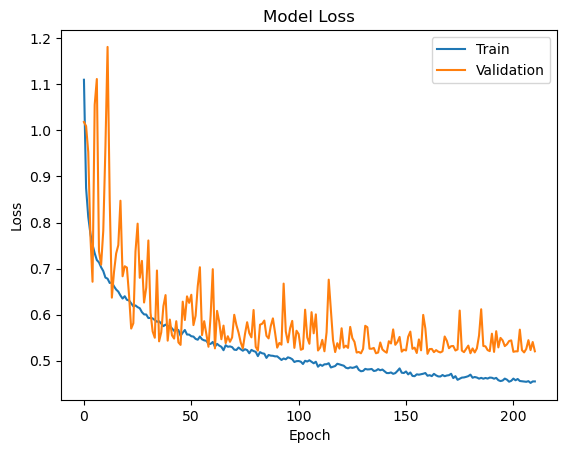

In [18]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()

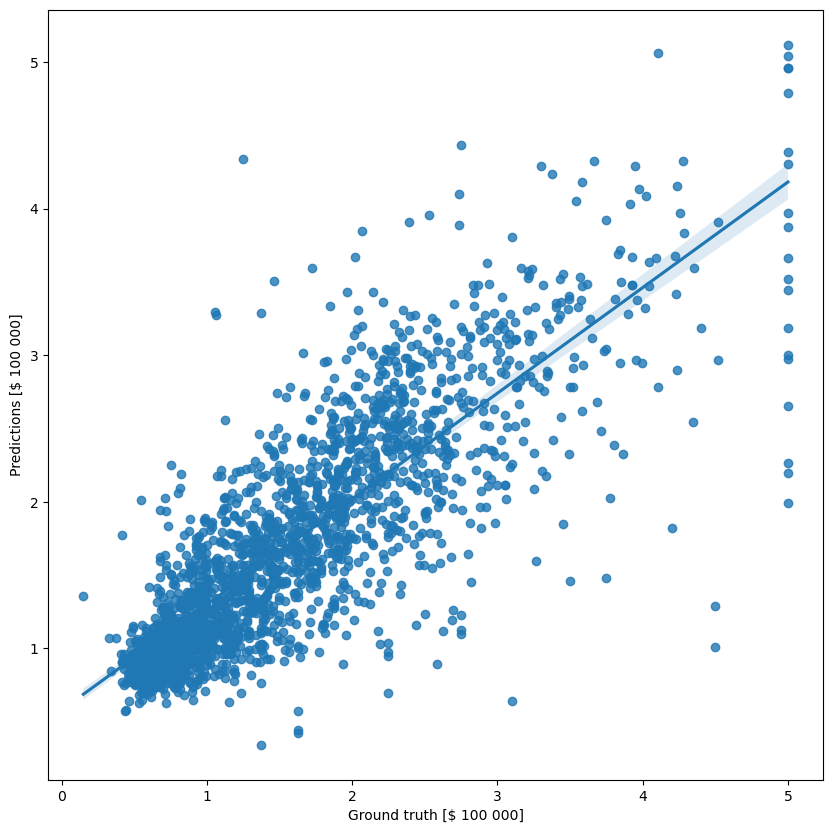

In [19]:
import seaborn as sns

plt.figure(figsize=(10,10))
fig = sns.regplot(x=Y_test, y=preds.reshape(-1));
# fig.set(xlim=(10,30),ylim=(10,30))
plt.xlabel("Ground truth [$ 100 000]")
plt.ylabel("Predictions [$ 100 000]")
plt.show()

### 7. A modell finomhangolása

Jelen esetben megállapíthatjuk, hogy a modell tanítása során nem jelentkezett semmilyen anomálisa, vagy rendellenesség. Nem állapítható meg túltanulás sem, ezért a kapott modellt **elfogadom**.

Ezen felül még érdemes figyelni, hogy mennyire gyorsan tud predikálni a modell és figyelembe venni, hogy vajon emellett képesek vagyunk-e valós idejű alkalmazást létrehozni. Ha nem, akkor célszerű egy egyszerűbb modellt választani.

### 8. Alkalmazás

Ha már nem tartunk igényt a modell további finomhangolására, akkor a `weights.keras` file-t elmentve készen állunk arra, hogy alkalmazásba ültessük a neurális hálónkat.

# 9. hét / III. Klasszifikáció: MNIST

Jelen példában ismételten egy "Hello World" típusú feladatot fogunk megvizsgálni, viszont jelen esetben már nem egy MLP (Multi Layer Perceptron) modellt fogunk segítségül hívni, hanem egy úgynevezett Konvolúciós Neurális Hálót, röviden CNN-t!

A feladat a következő: adott az MNIST adatbázis, amely rengeteg kézzel írott számjegyről tartalmaz 256x256-os felbontásban képeket. A feladatunk az, hogy készítsünk egy olyan modellt, amely képes egy újonnan beadott képről eldönteni, hogy azon milyen számjegy található!

Mielőtt mélyebbre áskálódnánk, fontos tisztázni, hogy miből is épül fel egy CNN! Tekintsük az alábbi példát: 
![cnn](2DCNN.png)

In [2]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Betöltjük az adatbázist - itt eleve szét van szedve tanító és teszt adathalamzra
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
x_train = x_train / 255
x_test = x_test / 255

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)
x_train = x_train.astype("float32")
x_test = x_test.astype("float32")

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

batch_size=128

In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, Embedding
from tensorflow.keras.optimizers import SGD

model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), activation='relu', input_shape=(28,28,1,)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

print(model.summary())

c:\Users\mbenc\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 24, 24, 32)     │           832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 20, 20, 64)     │        51,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6400)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       819,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 872,714 (3.33 MB)

 Trainable params: 872,714 (3.33 MB)

 Non-trainable params: 0 (0.00 B)

None


In [5]:
# Early stopping, amellyel figyeljük a validációs hibát (alap beállítás)
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
patience=10
early_stopping=EarlyStopping(patience=patience, verbose=1)
# Szintén a validációs hibát figyeljük, és elmentjük a legjobb modellt
checkpointer=ModelCheckpoint(filepath='mopdel.keras', save_best_only=True, verbose=1)
tb = TensorBoard(log_dir='logs', histogram_freq=1, write_graph=1)

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

network_history = model.fit(x_train, y_train, batch_size=128, epochs=30, verbose=1, validation_split=0.2, callbacks=[early_stopping, checkpointer, tb])

Epoch 1/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step - accuracy: 0.8315 - loss: 0.5210
Epoch 1: val_loss improved from inf to 0.05900, saving model to mopdel.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 78s 201ms/step - accuracy: 0.8317 - loss: 0.5203 - val_accuracy: 0.9826 - val_loss: 0.0590
Epoch 2/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.9714 - loss: 0.0967
Epoch 2: val_loss improved from 0.05900 to 0.04606, saving model to mopdel.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 71s 188ms/step - accuracy: 0.9714 - loss: 0.0967 - val_accuracy: 0.9867 - val_loss: 0.0461
Epoch 3/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 173ms/step - accuracy: 0.9791 - loss: 0.0686
Epoch 3: val_loss improved from 0.04606 to 0.03502, saving model to mopdel.keras
375/375 ━━━━━━━━━━━━━━━━━━━━ 76s 204ms/step - accuracy: 0.9791 - loss: 0.0685 - val_accuracy: 0.9899 - val_loss: 0.0350
Epoch 4/30
375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.9859 - loss: 0.0476
Epoch 4: val_loss improved from 0.03502 to 0.0339

KeyboardInterrupt: 

In [8]:
from keras.models import load_model
model = load_model("mopdel.keras")
test_err = model.evaluate(x_test,y_test)
print("Teszt hiba:", test_err[0], "Teszt pontosság:", test_err[1])

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9892 - loss: 0.0306
Teszt hiba: 0.025237729772925377 Teszt pontosság: 0.991599977016449


In [9]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, confusion_matrix,classification_report
# először is nyerjük ki a predikciókat (valószínüség és hozzá tartozó pontosságot)
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,1)
y_true = np.argmax(y_test,1)

print("test accuracy: %g" %(accuracy_score(y_true, y_pred)))
print("Precision", precision_score(y_true, y_pred, average="macro"))
print("Recall", recall_score(y_true, y_pred, average="macro"))
print("f1_score", f1_score(y_true, y_pred, average="macro"))
print("\nKonfúziós mátrix: ")
conf=confusion_matrix(y_true, y_pred)
print(conf)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step
test accuracy: 0.9916
Precision 0.991563758119932
Recall 0.991473706269493
f1_score 0.9915050484727665

Konfúziós mátrix: 
[[ 973    0    0    0    0    0    4    1    2    0]
 [   0 1133    0    1    0    0    1    0    0    0]
 [   0    2 1025    0    1    0    0    4    0    0]
 [   0    0    1 1005    0    1    0    2    1    0]
 [   0    0    0    0  978    0    0    1    0    3]
 [   0    0    0    7    0  881    2    1    0    1]
 [   0    2    1    0    2    4  947    0    2    0]
 [   0    1    2    3    1    0    0 1020    1    0]
 [   0    0    2    1    0    1    0    1  968    1]
 [   1    0    1    2    5    4    1    6    3  986]]


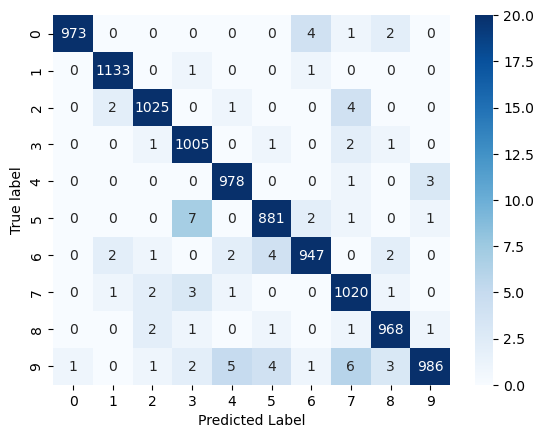

In [10]:
import seaborn as sns
ax = sns.heatmap(conf, annot=True, fmt='d', vmax=20, cmap='Blues') # a vmax paraméterrel állítjuk be, hogy milyen értéktartományban jelenítse meg az adatokat
ax.set(xlabel='Predicted Label',
       ylabel='True label');